In [ ]:
# This modeling code is based on the tutorial script here:
# https://colab.research.google.com/drive/1Y4o3jh3ZH70tl6mCd76vz_IxX23biCPP


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip install transformers
import numpy as np
import pandas as pd
import os

In [ ]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/sentiment_12000.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 99



,full_text,lang,clean_text,sentences_tone,document_tones,sadness,joy,confident,tentative,anger,analytical,fear
95,"RT @DrDenaGrayson: ‼️#Florida passes 100,000 #...",en,"RT : ‼️#Florida passes 100,000 #coronavirus ca...","[{'sentence_id': 0, 'text': 'RT : ‼️#Florida p...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,RT @DrKatrin_Rabiei: I wish the same amount of...,en,RT : I wish the same amount of people who are ...,NaN,"[{'score': 0.781809, 'tone_id': 'sadness', 'to...",1.0,NaN,NaN,NaN,NaN,NaN,NaN
36,"#CoronaVirusFromMinorChastisement\n\n""O who cl...",en,"#CoronaVirusFromMinorChastisement\n\n""O who cl...","[{'sentence_id': 0, 'text': '#CoronaVirusFromM...","[{'score': 0.724923, 'tone_id': 'confident', '...",NaN,NaN,1.0,NaN,NaN,NaN,NaN
21,RT @ShawnInArizona: cc: All hospital staff in ...,en,RT : cc: All hospital staff in Florida\n\nYour...,"[{'sentence_id': 0, 'text': 'RT : cc: All hosp...","[{'score': 0.770688, 'tone_id': 'sadness', 'to...",1.0,NaN,1.0,NaN,NaN,NaN,NaN
13,"RT @DrDenaGrayson: ‼️#Florida passes 100,000 #...",en,"RT : ‼️#Florida passes 100,000 #coronavirus ca...","[{'sentence_id': 0, 'text': 'RT : ‼️#Florida p...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,"@KBeds If that were true, why did he make a tr...",en,"If that were true, why did he make a trade de...","[{'sentence_id': 0, 'text': 'If that were true...","[{'score': 0.509573, 'tone_id': 'joy', 'tone_n...",NaN,1.0,NaN,1.0,NaN,NaN,NaN
88,RT @jsblokland: J.P. Morgan on the #Covid19 #r...,en,RT : J.P. Morgan on the #Covid19 #recession: d...,NaN,"[{'score': 0.62573, 'tone_id': 'sadness', 'ton...",1.0,NaN,NaN,NaN,NaN,NaN,NaN
42,RT @aayshacader: #TVTConnect #TVT2020\nLive Q&...,en,RT : #TVTConnect #TVT2020\nLive Q&amp;A\n🟡shor...,"[{'sentence_id': 0, 'text': 'RT : #TVTConnect ...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,RT @21WIRE: What a f***ing gravy train this wh...,en,RT : What a f***ing gravy train this whole #Ne...,"[{'sentence_id': 0, 'text': 'RT : What a f***i...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,RT @BerkeleyJr: Record #Covid19 case numbers a...,en,"RT : Record #Covid19 case numbers aren't a ""te...","[{'sentence_id': 0, 'text': 'RT : Record #Covi...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
anger = df[['clean_text','joy']]

anger.joy = [np.nan_to_num(x) for x in anger['joy']]
anger = anger.astype({"joy": int})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
print(anger)

                                           clean_text  joy
0   RT : 📬 I delivered this ✉️ from Sandra, a 🗳 ve...    0
1   RT : 500 Delta employees test positive for cov...    1
2   RT : #Ohio's #COVID19 data for June 22, 2020.\...    0
3   RT : A friend's father is Covid positive and h...    1
4   RT : #Iran: Shocking charges against jailed wo...    0
..                                                ...  ...
94  A look at respiratory failure in young healthy...    1
95  RT : ‼️#Florida passes 100,000 #coronavirus ca...    0
96  RT : This year’s challenge is to make sure tha...    0
97   If that were true, why did he make a trade de...    1
98  RT : JFC... This is on you,  I currently have ...    1

[99 rows x 2 columns]


In [ ]:
anger.sample(10)

,clean_text,joy
10,RT : BREAKING: COVID19 UPDATE: 2 additional de...,0
89,"meanwhile, dirty infected dishes sit back ...",0
14,I am raising #money to save our #family home. ...,0
35,"RT : #AndrewCuomo's response is effectively,...",0
50,B.C. MLA's are back at the Legislature with th...,0
33,RT : I'm raising money for a Thailand Mission ...,1
31,RT : We are setting up a #Manchester #COVID19...,1
17,RT : Uganda has been able to blunt the virus a...,0
91,RT : The advice for clinically extremely vulne...,0
23,RT : Three spheres of government will be in co...,0


In [ ]:
# Get the lists of sentences and their labels.
sentences = anger.clean_text.values
labels = anger.joy.values

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  RT : 📬 I delivered this ✉️ from Sandra, a 🗳 verified voter in Appleton, Wis., to  and  #WI08 #WI…
Tokenized:  ['rt', ':', '[UNK]', 'i', 'delivered', 'this', '[UNK]', 'from', 'sandra', ',', 'a', '[UNK]', 'verified', 'voter', 'in', 'appleton', ',', 'wi', '##s', '.', ',', 'to', 'and', '#', 'wi', '##0', '##8', '#', 'wi', '…']
Token IDs:  [19387, 1024, 100, 1045, 5359, 2023, 100, 2013, 12834, 1010, 1037, 100, 20119, 14303, 1999, 26050, 1010, 15536, 2015, 1012, 1010, 2000, 1998, 1001, 15536, 2692, 2620, 1001, 15536, 1529]


## Sentences to IDs

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,  # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                              )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  RT : 📬 I delivered this ✉️ from Sandra, a 🗳 verified voter in Appleton, Wis., to  and  #WI08 #WI…
Token IDs: [101, 19387, 1024, 100, 1045, 5359, 2023, 100, 2013, 12834, 1010, 1037, 100, 20119, 14303, 1999, 26050, 1010, 15536, 2015, 1012, 1010, 2000, 1998, 1001, 15536, 2692, 2620, 1001, 15536, 1529, 102]


## Padding & Truncating

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  80


In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
MAX_LEN = 200

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 200 values...

Padding token: "[PAD]", ID: 0

Done.


Using TensorFlow backend.


## Attention Masks

In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

## Train/validation Split

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                            random_state=1999, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                              random_state=1999, test_size=0.1)

## Converting to Pytorch Form

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


# Modeling

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2,    
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Set Optimizer and Learning Rate

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon  
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                       num_warmup_steps = 0, # Default value in run_glue.py
                       num_training_steps = total_steps)

## Training Loop

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 18

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.67
  Training epcoh took: 0:00:06

Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:00

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.55
  Training epcoh took: 0:00:06

Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:00

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.48
  Training epcoh took: 0:00:06

Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:00

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.42
  Training epcoh took: 0:00:06

Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:00

Training complete!


## Plot Loss

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


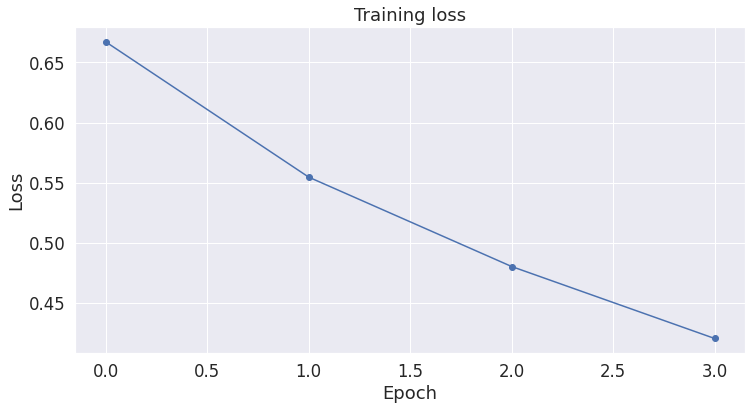

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# Perform on Test

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/sentiment_12000.csv")

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
anger = df[['clean_text','joy']]

Number of test sentences: 99



In [ ]:
anger.joy = [np.nan_to_num(x) for x in anger['joy']]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
anger = anger.astype({"joy": int})

In [ ]:
# Create sentence and label lists
sentences = anger.clean_text.values
labels = anger.joy.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 99 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (anger.joy.sum(), len(anger.joy), (anger.joy.sum() / len(anger.joy) * 100.0)))

Positive samples: 31 of 99 (31.31%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


## Output Test Results

In [ ]:
frames = [flat_true_labels, flat_predictions]

In [ ]:
table = pd.DataFrame(frames)

In [ ]:
results = table.T
results.columns =['True', 'Pred'] 
results.head()

,True,Pred
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [ ]:
table_to_save =anger.merge(results, left_index=True, right_index=True)

In [ ]:
table_to_save.to_csv('testing_data_results.csv')

# Label Other Tweets

In [ ]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/data_test_0308_0323.csv")

# Report the number of sentences.
print('Number of unlabeled sentences: {:,}\n'.format(df.shape[0]))
analytical = df[['clean_text']]

FileNotFoundError: ignored

In [ ]:
# Create sentence and label lists
sentences = analytical.clean_text.values
# labels = sadness.sadness.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
# prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions  = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  # label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  # true_labels.append(label_ids)

print('    DONE.')

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [ ]:
table1 = pd.DataFrame(flat_predictions)
table1.columns = ['pred_anger']
df1 = df[['text', 'timestamp', 'clean_text']]

In [ ]:
pred_output1 = df1.merge(table1,left_index=True, right_index=True)
pred_output1.to_csv('data_test_0324_0408_anger_lite.csv')

In [ ]:
len(pred_output1)